In [1]:
import iplantuml
from subprocess import run
from IPython.core.magic import register_cell_magic
from IPython.display import SVG

@register_cell_magic
def plantuml(line, code):
    cmd = ["plantuml", "-tsvg", "-pipe"]
    compl = run(cmd, input=code, text=True, capture_output=True)
    return SVG(compl.stdout)

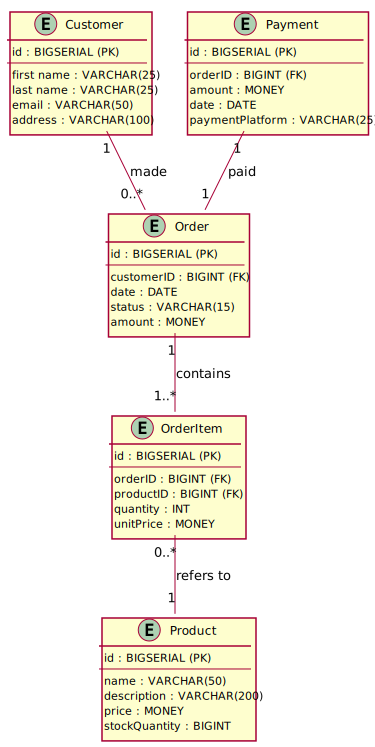

In [2]:
%%plantuml

@startuml
entity "Customer" {
    id : BIGSERIAL (PK)
    --
    first name : VARCHAR(25)
    last name : VARCHAR(25)
    email : VARCHAR(50)
    address : VARCHAR(100)
}
entity "Product" {
    id : BIGSERIAL (PK)
    --
    name : VARCHAR(50)
    description : VARCHAR(200)
    price : MONEY
    stockQuantity : BIGINT
}

entity "Order" {
    id : BIGSERIAL (PK)
    --
    customerID : BIGINT (FK)
    date : DATE
    status : VARCHAR(15)
    amount : MONEY
}

entity "OrderItem" {
    id : BIGSERIAL (PK)
    --
    orderID : BIGINT (FK)
    productID : BIGINT (FK)
    quantity : INT
    unitPrice : MONEY
}

entity "Payment" {
    id : BIGSERIAL (PK)
    --
    orderID : BIGINT (FK)
    amount : MONEY
    date : DATE
    paymentPlatform : VARCHAR(25)
}

Customer "1" -- "0..*" Order : made
Order "1" -- "1..*" OrderItem : contains
OrderItem "0..*" -- "1" Product : refers to
Payment "1" -- "1" Order : paid
@enduml